# 01: Classification

> Explainable AI for liquefaction

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/01-classification/01-classification-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/01-classification/01-classification.ipynb)

## Liquefaction

> Durante, M. G., & Rathje, E. M. (2021). An exploration of the use of machine learning to predict lateral spreading. Earthquake Spectra, 37(4), 2288-2314.

Soil liquefaction is a phenomenon that typically occurs in saturated loose sandy soils subjected to rapid loading conditions, such as earthquakes. The generation of excess pore water pressure is a direct consequence of the rapid loading, which can lead to a sudden reduction in the strength and stiffness of the soil. In the presence of gently sloping ground or near the free face of a slope, the occurrence of earthquake-induced liquefaction may generate lateral displacements, known as lateral spreading.

![liquefaction](liquefaction.png)

> Fig: (a) Observed liquefaction-related damage (data from NZGD, 2013), and (b) lateral spreading
horizontal displacement observed from optical image correlation (data from Rathje et al., 2017b) in the
Avon River area for the 2011 Christchurch earthquake

## Lateral spreading classification

Durante and Rathje (2021) classified sites that experienced more than 0.3 m displacement as lateral spreading. We now evaluate different factors that influence soil lateral spreading, such as (i) Ground Water Table (ground water closer to surface means more chance of liquefaction), (ii) slope angle (steeper the slope more lateral spreading), (iii) PGA - Peak Ground acceleration (intensity of earthquake shaking), and (iv) elevation (certain sites on high terrace don't show lateral spreading).

![Factors affecting liquefaction](liq-factors.png)

> Image credits: Durante and Rathje (2021).

## Classification: Decision Trees

Classification is the task of predicting a categorical target variable based on input data. There are two main types of classification:

**Binary classification**: The target variable has two possible classes, often labeled 0 and 1. The goal is to predict which of the two classes an input belongs to. Examples include spam detection, disease diagnosis, etc.

**Multi-class classification**: The target variable has more than two possible discrete values or classes. The goal is to predict the specific class an input belongs to out of the multiple choices. Examples include image recognition, document categorization, etc.

A decision tree is a supervised learning model used for both binary and multi-class classification. It works by recursively partitioning the input space into smaller subspaces based on the value of different predictor variables. The goal is to create leaf nodes that contain cases with similar values of the target variable.

The structure of a decision tree consists of:

  *  __Root node__: This is the topmost node in the tree and contains the full dataset.
  *  __Internal nodes__: These represent points where the data is split based on values of predictor variables.
  *  __Branches__: These connect the internal nodesbased on possible values of predictors.
  *  __Leaf nodes__: These represent the final classifications or predictions.

Decision trees can handle both categorical and continuous predictors. 

Some key advantages of decision trees are:

* __Interpretability__ - The tree structure and rules are easy to understand.
* __Non-parametric__ - No assumptions about data distribution.
* __Handles nonlinear relationships__ - By partitioning data recursively.
* __Handles categorical variables__ - No need for dummy coding.

![liquefaction decision tree](liq-dt.png)

### GINI Impurity

Gini impurity is used to evaluate how good a split is by calculating the impurity of the subsets resulting from the split. A lower Gini score means that the split is separating the classes well. It quantifies the disorder or uncertainty within a set of data.

The Gini impurity for a binary classification is calculated as:
$$Gini(t)=1−\sum(p_i)^2$$

where $p_i$​ is the probability of class $i$ in the set.

### Decision Tree splitting

A decision tree decides a split by selecting a feature and a value to divide the dataset into two or more homogenous subsets, according to a certain criterion. The ultimate goal is to find the splits that produce the purest subsets, meaning that each subset ideally contains data points from only one class. Here's how it works:

  - **Selection of Criteria**: The method used to decide a split depends on the criterion being used. Common criteria for classification tasks include Gini Impurity, Information Gain, and Chi-Squared. For regression tasks, variance reduction is often used.

  - **Evaluate Each Feature and Potential Split**: For each feature in the dataset, the algorithm calculates the criterion's value for every potential split point. Split points can be the actual values of a continuous feature or different categories of a categorical feature.

  - **Choose the Best Split**: The algorithm selects the feature and split point that produces the subsets with the highest purity according to the chosen criterion. For example:
        In the case of Gini Impurity, the best split minimizes the impurity.
        In the case of Information Gain, the best split maximizes the gain.

  - **Create Subsets**: Once the best split has been identified, the dataset is divided into subsets according to the chosen feature and split point.

  - **Repeat**: Steps 1-4 are repeated recursively on each of the subsets until a stopping criterion is met, such as reaching a certain tree depth or the subsets being pure enough.

#### Example Using Gini Impurity

  - For each feature, consider all possible values for splitting.
  - Choose the split that results in the lowest weighted Gini Impurity.
  - Calculate the Gini Impurity for each possible split as:
  - Divide the dataset accordingly and continue the process.

In the context of decision trees, the splitting process is essential as it helps the model generalize the pattern from the training data, enabling accurate predictions or classifications for unseen data. It's the core step in building the tree, and different algorithms might have variations in the splitting procedure.

## Decision tree with SciKit Learn

Scikit-learn, often referred to as sklearn, is one of the most popular libraries for machine learning in Python

In [4]:
!pip3 install scikit-learn pandas

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

### Explore data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/kks32-courses/sciml/main/lectures/01-classification/RF_YN_Model3.csv')

In [7]:
df.head()

,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
0,182,0.370809,0.909116,0.319117,5.465739,0.546270,0
1,15635,1.300896,1.123009,0.211770,0.905948,0.532398,0
2,8292,1.300896,0.847858,0.195947,0.849104,0.532398,0
3,15629,1.788212,2.044325,0.115795,0.451034,0.542307,0
4,183,1.637517,2.003797,0.137265,0.941866,0.545784,1


In [8]:
df = df.drop(['Test ID', 'Elevation'], axis=1)
df.head()

,GWD (m),L (km),Slope (%),PGA (g),Target
0,0.370809,0.319117,5.465739,0.546270,0
1,1.300896,0.211770,0.905948,0.532398,0
2,1.300896,0.195947,0.849104,0.532398,0
3,1.788212,0.115795,0.451034,0.542307,0
4,1.637517,0.137265,0.941866,0.545784,1


In [9]:
X = df.copy(deep=True)
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Target, dtype: int64

In [10]:
X

,GWD (m),L (km),Slope (%),PGA (g),Target
0,0.370809,0.319117,5.465739,0.546270,0
1,1.300896,0.211770,0.905948,0.532398,0
2,1.300896,0.195947,0.849104,0.532398,0
3,1.788212,0.115795,0.451034,0.542307,0
4,1.637517,0.137265,0.941866,0.545784,1
...,...,...,...,...,...
7286,1.631807,0.352863,0.839925,0.420179,0
7287,1.269804,0.584068,0.050562,0.416337,0
7288,1.500085,0.441609,0.360601,0.420179,0
7289,1.775998,0.353520,1.204065,0.420179,0


In [11]:
X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2)
X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.2)

In [12]:
X_val_target

,GWD (m),L (km),Slope (%),PGA (g),Target
2074,2.243060,1.128009,0.556541,0.412280,1
3225,2.310902,1.983713,0.000000,0.413459,0
5816,3.042242,0.149327,0.661831,0.443339,0
4520,1.672946,0.603445,0.345039,0.420741,0
3056,2.001447,1.024880,0.816727,0.443319,1
...,...,...,...,...,...
3561,1.691960,0.755911,0.659987,0.474853,1
5725,2.835478,0.884954,1.378123,0.415294,0
4625,0.782569,0.996662,0.211627,0.413167,0
7188,1.217597,0.470850,0.766472,0.415762,0


In [13]:
X_train = X_train_target.drop(['Target'], axis=1)
X_test = X_test_target.drop(['Target'], axis=1)
X_val = X_val_target.drop(['Target'], axis=1)

In [14]:
X_test.head()

,GWD (m),L (km),Slope (%),PGA (g)
5703,1.342004,0.491025,5.150787,0.422555
4128,1.397046,0.072770,0.246042,0.513281
2347,2.186488,1.370897,0.508970,0.410625
3489,1.549115,0.861001,0.940807,0.471565
6496,1.990132,0.137762,0.612021,0.431009


In [15]:
y_test.head()

5703    0
4128    1
2347    0
3489    1
6496    0
Name: Target, dtype: int64

# Decision tree classifier

In [16]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

Training score: 66.00%
Validation score: 63.70%
Testing score: 68.04%


#### Prediction

In [ ]:
clf.predict(X_test)[4]

0

## Metrics

A confusion matrix is commonly used to evaluate the performance of a machine learning classification model. It is an N x N matrix that summarizes how well the model classifies examples into N distinct classes.

The confusion matrix compares the actual target values to the predicted values. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class. A higher count of TP and TN indicates better model performance, while more FP and FN points mean the model is making errors.

Key evaluation metrics derived from the confusion matrix are accuracy, recall (or true positive rate), and precision. Accuracy measures the overall percentage of correct classifications, treating false positives and false negatives equally.

Recall calculates the fraction of positive cases that are correctly classified as positive. It looks across the rows of the confusion matrix. Precision looks down the columns, measuring the fraction of positive predictions that are true positives. High precision means few false positives.

For binary classification, the formulas for these metrics are:

Accuracy = $(TP + TN)/(TP + TN + FP + FN)$

Recall = $TP/(TP + FN)$ = TP/(all positive data)

Precision = $TP/(TP + FP)$ = TP/(all positive predictions)

The confusion matrix and these metrics provide a quantitative assessment of model performance on a classification problem. They highlight the types of errors and allow targeted improvement.

Researchers commonly use receiver operating characteristic (ROC) curves to evaluate the performance of machine learning classification models. A ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) for different classification probability thresholds. The TPR, also called recall, represents the percentage of positive cases correctly classified. The FPR represents the percentage of negative cases incorrectly classified as positive.

The FPR represents the fraction of the negative points that are incorrectly classified as positive (FPR = FP/(FP + TN) = FP/(all negative data)). An ideal classifier will have a ROC curve that passes through the top left corner, with a TPR of 1 and FPR of 0. A random classifier will have a ROC curve along the diagonal line where TPR equals FPR. Less accurate models have curves closer to the diagonal, while more accurate models have curves further up and left.

The area under the ROC curve (AUC) quantifies the model's performance. Larger AUC values indicate better classification, with a maximum of 1. AUC values near 0.5 imply performance equal to a random classifier.

Although designed for binary classification, ROC analysis can be extended to multi-class problems using a one-vs-rest approach. This involves creating a binary classifier for each class against the rest. The per-class ROC curves are averaged, weighting by class size, to produce an overall curve.

## Visualize a decision tree

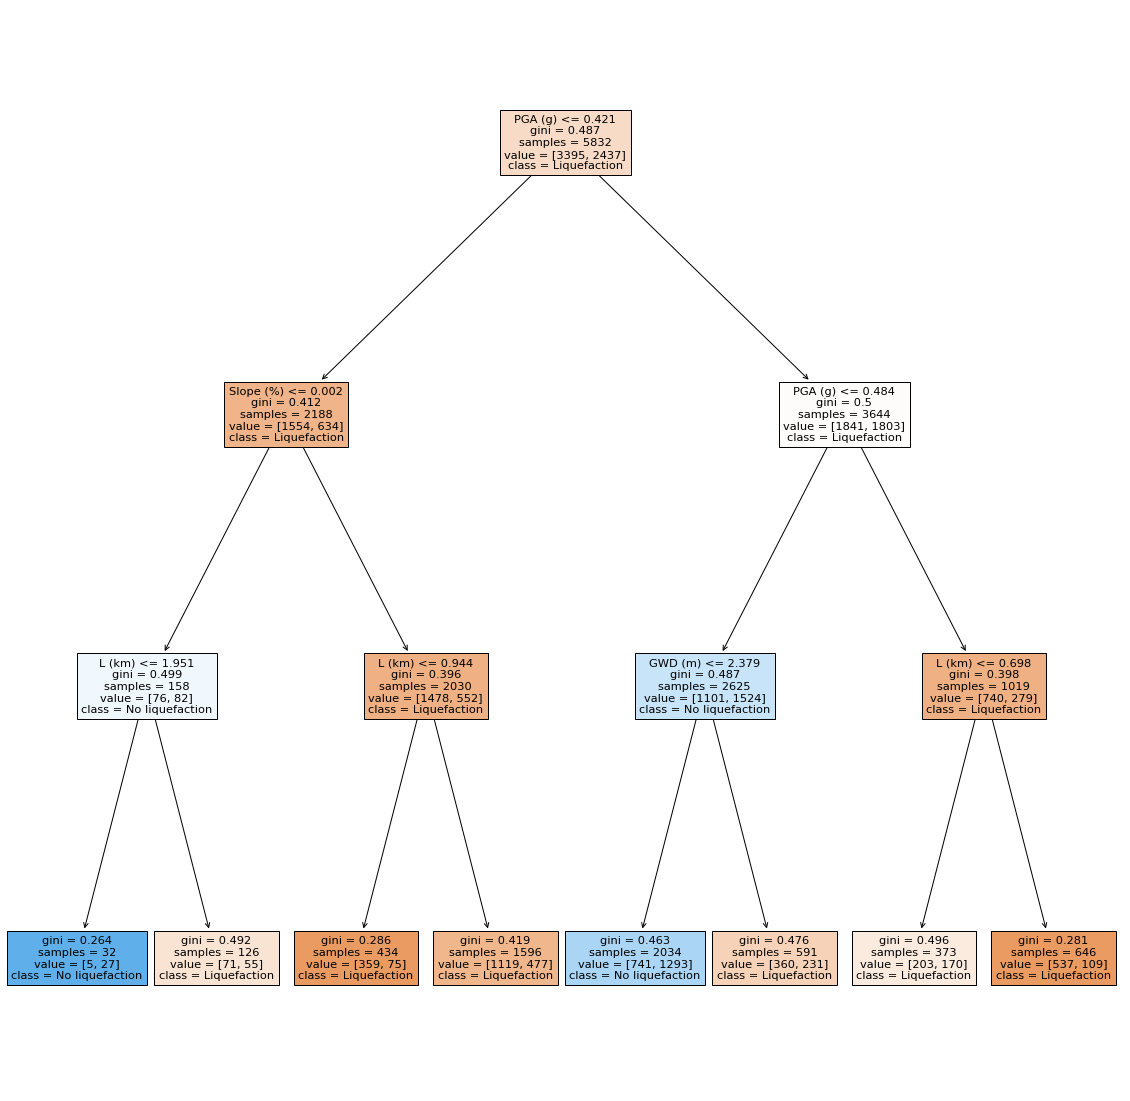

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, 
               feature_names =['GWD (m)', 'L (km)', 'Slope (%)', 'PGA (g)'],
               class_names=['Liquefaction', 'No liquefaction'],
               filled = True)
fig.show()

## Random Forest

![Decision tree vs Random Forest](decision-tree-rf.png)

## Extreme Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBClassifier(max_depth=9)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_val, y_val)

0.8664383561643836

In [ ]:
xgb.score(X_test, y_test)

0.8543273350471294

In [ ]:
clf.score(X_test, y_test)

0.8063410454155956

## Explainable AI with SHAP

In [ ]:
!pip install shap

In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

In [ ]:
X_test_target.head()

,GWD (m),L (km),Slope (%),PGA (g),Target
1494,2.389243,1.458294,1.042721,0.373080,1
2137,1.798434,0.742778,0.834584,0.424421,1
4589,2.050072,2.451880,1.738290,0.371928,0
161,1.566298,2.154551,0.909582,0.377088,0
4893,1.466750,1.989314,0.892403,0.382741,0


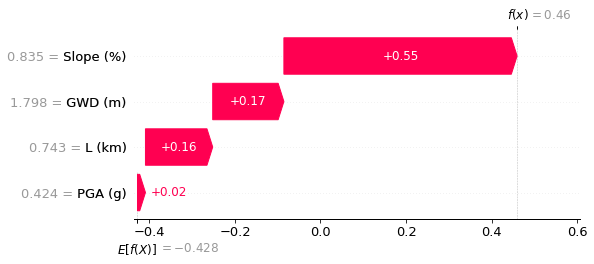

In [ ]:
shap.plots.waterfall(shap_values[1])

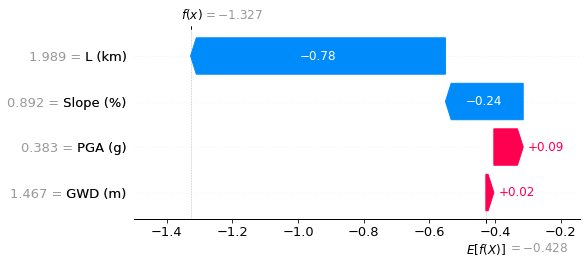

In [ ]:
shap.plots.waterfall(shap_values[4])

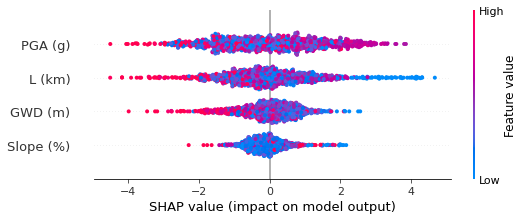

In [ ]:
shap.plots.beeswarm(shap_values)